In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# DF 불러오기

In [123]:
df0 = pd.read_csv('./after_preprocessing_data/df_final_0627.csv')

In [124]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536097 entries, 0 to 536096
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   자치구                536097 non-null  object 
 1   계약일                536097 non-null  object 
 2   건물면적(㎡)            536097 non-null  float64
 3   층                  536097 non-null  int64  
 4   KOSPI종가            536097 non-null  float64
 5   Fed기준금리            536097 non-null  float64
 6   국제유가(Dubai)($/배럴)  536097 non-null  float64
 7   부동산거래량             536097 non-null  int64  
 8   국고채5년(평균)          536097 non-null  float64
 9   국고채10년(평균)         536097 non-null  float64
 10  회사채3년(평균)          536097 non-null  float64
 11  CD91물(평균)          536097 non-null  float64
 12  BOK기준금리            536097 non-null  float64
 13  건물연식               536097 non-null  int64  
 14  GDP대비가계부채비율        536097 non-null  float64
 15  환율종가               536097 non-null  float64
 16  금값

# Train/Test Split


In [125]:
# Train : 2016-2020
# Test : 2021-2022

df0['계약일'] = pd.to_datetime(df0['계약일'])

In [126]:
train_df = df0.loc[df0['계약일'] < '2021']

In [127]:
test_df = df0.loc[df0['계약일'] >= '2021']

## feature & target split

In [128]:
# Train Split
# feature & target  split

X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

In [129]:
# Test Split
# feature & target  split

X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']

# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

---

# Scaling
1. Features - minMax
2. Target - Log 

In [130]:
# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [131]:
# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)
y_test_scaled

453170    4.716003
453171    4.722634
453172    4.380211
453173    5.079181
453174    4.361728
            ...   
536092    5.397940
536093    5.139879
536094    5.235528
536095    4.568202
536096    4.883661
Name: 물건금액(만원), Length: 82927, dtype: float64

# OLS - Scaling 후

## OLS_1

In [132]:
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                 2.536e+04
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:33:47   Log-Likelihood:             1.2288e+05
No. Observations:              453170   AIC:                        -2.457e+05
Df Residuals:                  453151   BIC:                        -2.455e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.1734      0.008    540.213      0.000       4.158       4.188
건물면적(㎡)               2.2623      0.004    594.634      0.000       2.255       2.270
층                     0.2877      0.003     87.173      0.000       0.281       0.294
KOSPI종가               0.2308      0.006     36.831      0.000       0.218       0.243
Fed기준금리              -0.0236      0.004     -6.316      0.000      -0.031      -0.016
국제유가(Dubai)($/배럴)     0.1106      0.004     25.192      0.000       0.102       0.119
부동산거래량               -0.0601      0.002    -26.724      0.000      -0.065      -0.056
국고채5년(평균)             0.0128      0.020      0.646      0.518      -0.026       0.051
국고채10년(평균)           -0.0172      0.014     -1.208      0.227      -0.045       0.011
회사채3년(평균)            -0.0499      0.006     -8.262      0.000      -0.062      -0.038
CD91물(평균)            -0.0958      0.009    -10.749      0.000      -0.113      -0.078
BOK기준금리               0.0296      0.008      3.899      0.000       0.015       0.045
건물연식                 -0.0101      0.002     -5.703      0.000      -0.014      -0.007
GDP대비가계부채비율           0.2006      0.005     42.868      0.000       0.191       0.210
환율종가                  0.0540      0.003     16.439      0.000       0.048       0.060
금값종가                  0.0733      0.005     15.071      0.000       0.064       0.083
선행지수순환변동치            -0.0502      0.005    -10.868      0.000      -0.059      -0.041
EPU                  -0.0124      0.002     -6.159      0.000      -0.016      -0.008
장단기금리spread          -0.0296      0.009     -3.267      0.001      -0.047      -0.012
==============================================================================
Omnibus:                    14026.821   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16014.587
Skew:                           0.409   Prob(JB):                         0.00
Kurtosis:                       3.423   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 국고채5년(평균), 국고채10년(평균) column 삭제

In [133]:
X_scaled.drop(['국고채5년(평균)','국고채10년(평균)'], axis=1, inplace=True)

In [134]:
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                 2.853e+04
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:33:48   Log-Likelihood:             1.2288e+05
No. Observations:              453170   AIC:                        -2.457e+05
Df Residuals:                  453153   BIC:                        -2.455e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.1742      0.006    743.482      0.000       4.163       4.185
건물면적(㎡)               2.2624      0.004    594.704      0.000       2.255       2.270
층                     0.2877      0.003     87.185      0.000       0.281       0.294
KOSPI종가               0.2314      0.006     37.420      0.000       0.219       0.244
Fed기준금리              -0.0234      0.004     -6.411      0.000      -0.031      -0.016
국제유가(Dubai)($/배럴)     0.1108      0.004     25.277      0.000       0.102       0.119
부동산거래량               -0.0603      0.002    -27.202      0.000      -0.065      -0.056
회사채3년(평균)            -0.0535      0.004    -11.933      0.000      -0.062      -0.045
CD91물(평균)            -0.0998      0.007    -14.729      0.000      -0.113      -0.086
BOK기준금리               0.0331      0.007      5.038      0.000       0.020       0.046
건물연식                 -0.0102      0.002     -5.731      0.000      -0.014      -0.007
GDP대비가계부채비율           0.2008      0.005     43.679      0.000       0.192       0.210
환율종가                  0.0524      0.003     17.730      0.000       0.047       0.058
금값종가                  0.0741      0.005     15.512      0.000       0.065       0.083
선행지수순환변동치            -0.0539      0.004    -15.078      0.000      -0.061      -0.047
EPU                  -0.0123      0.002     -6.315      0.000      -0.016      -0.008
장단기금리spread          -0.0283      0.006     -4.711      0.000      -0.040      -0.017
==============================================================================
Omnibus:                    14025.017   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16013.160
Skew:                           0.409   Prob(JB):                         0.00
Kurtosis:                       3.424   Cond. No.                         69.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- OLS P_value로 제거할 컬럼 없음

## VIF_1

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif


In [136]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.226946            건물면적(㎡)
1     5.074445                  층
2   125.064469            KOSPI종가
3    28.001589            Fed기준금리
4    87.879257  국제유가(Dubai)($/배럴)
5    12.926349             부동산거래량
6    56.544430          회사채3년(평균)
7   242.311103          CD91물(평균)
8   217.204201            BOK기준금리
9     5.551061               건물연식
10   45.311486        GDP대비가계부채비율
11   18.237495               환율종가
12   25.990298               금값종가
13   66.295687          선행지수순환변동치
14    5.467013                EPU
15  139.057438        장단기금리spread


### CD91물 삭제

In [137]:
X_scaled.drop('CD91물(평균)', axis=1, inplace=True)

## OLS_2

In [138]:
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                 3.040e+04
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:34:05   Log-Likelihood:             1.2277e+05
No. Observations:              453170   AIC:                        -2.455e+05
Df Residuals:                  453154   BIC:                        -2.453e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.1497      0.005    773.901      0.000       4.139       4.160
건물면적(㎡)               2.2633      0.004    594.879      0.000       2.256       2.271
층                     0.2878      0.003     87.203      0.000       0.281       0.294
KOSPI종가               0.2570      0.006     43.271      0.000       0.245       0.269
Fed기준금리              -0.0302      0.004     -8.338      0.000      -0.037      -0.023
국제유가(Dubai)($/배럴)     0.0986      0.004     22.894      0.000       0.090       0.107
부동산거래량               -0.0570      0.002    -25.853      0.000      -0.061      -0.053
회사채3년(평균)            -0.0556      0.004    -12.411      0.000      -0.064      -0.047
BOK기준금리              -0.0289      0.005     -5.720      0.000      -0.039      -0.019
건물연식                 -0.0103      0.002     -5.804      0.000      -0.014      -0.007
GDP대비가계부채비율           0.2172      0.004     48.698      0.000       0.209       0.226
환율종가                  0.0553      0.003     18.726      0.000       0.049       0.061
금값종가                  0.0472      0.004     10.688      0.000       0.039       0.056
선행지수순환변동치            -0.0603      0.004    -16.996      0.000      -0.067      -0.053
EPU                  -0.0140      0.002     -7.196      0.000      -0.018      -0.010
장단기금리spread          -0.0294      0.006     -4.885      0.000      -0.041      -0.018
==============================================================================
Omnibus:                    14069.217   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16059.713
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                       3.423   Cond. No.                         65.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_2

In [139]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.224409            건물면적(㎡)
1     5.070246                  층
2   120.935107            KOSPI종가
3    27.778247            Fed기준금리
4    82.659743  국제유가(Dubai)($/배럴)
5    12.807566             부동산거래량
6    55.680294          회사채3년(평균)
7    60.850672            BOK기준금리
8     5.540469               건물연식
9    44.708803        GDP대비가계부채비율
10   18.046750               환율종가
11   20.860543               금값종가
12   65.086100          선행지수순환변동치
13    5.406565                EPU
14  136.718277        장단기금리spread


### VIF2 & Heatmap

In [140]:
# 각 숫자형 변수들의 피어슨 상관 분포를 히트맵으로 출력
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (15, 15))
    plt.rc('font', family = 'Malgun Gothic')
    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'coolwarm', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)

c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


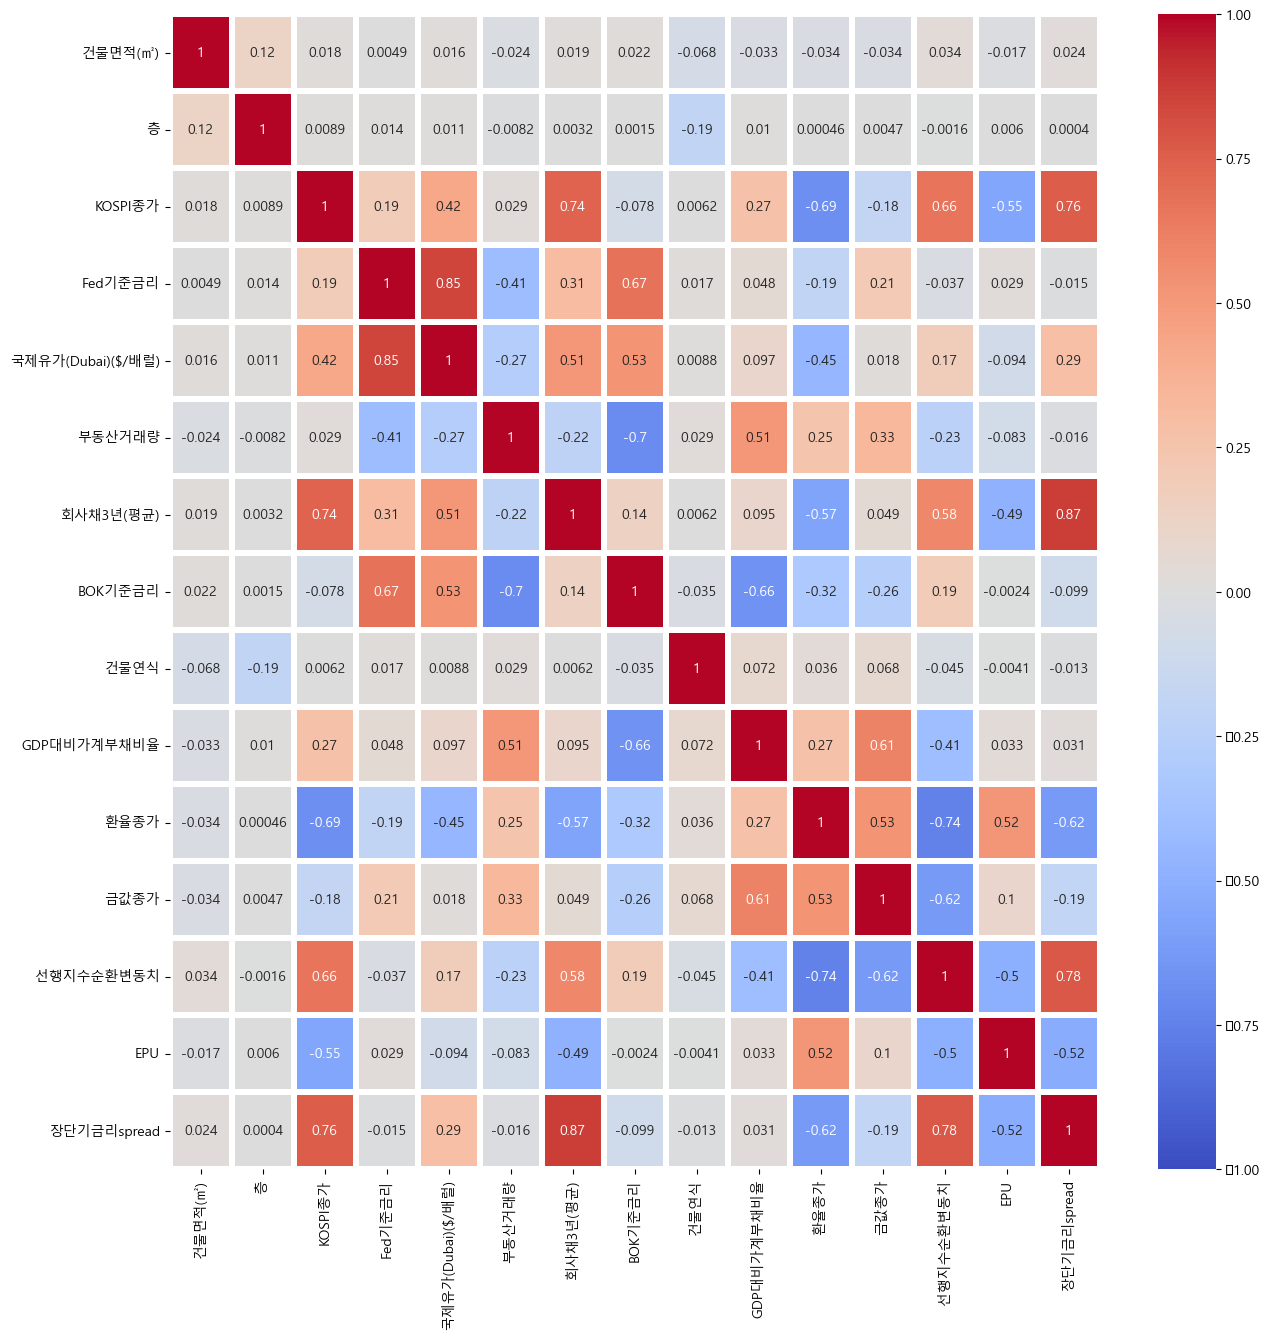

In [141]:
plot_cor(X_scaled)

### 회사채 3년 제거

In [142]:
# 회사채 3년 
X_scaled_1 = X_scaled.drop('회사채3년(평균)', axis=1)

## OLS_3

In [143]:
# ols 3

# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled_1, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                 3.255e+04
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:34:20   Log-Likelihood:             1.2270e+05
No. Observations:              453170   AIC:                        -2.454e+05
Df Residuals:                  453155   BIC:                        -2.452e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.1811      0.005    884.809      0.000       4.172       4.190
건물면적(㎡)               2.2635      0.004    594.849      0.000       2.256       2.271
층                     0.2881      0.003     87.283      0.000       0.282       0.295
KOSPI종가               0.2275      0.005     41.788      0.000       0.217       0.238
Fed기준금리              -0.0198      0.004     -5.601      0.000      -0.027      -0.013
국제유가(Dubai)($/배럴)     0.0916      0.004     21.459      0.000       0.083       0.100
부동산거래량               -0.0437      0.002    -22.676      0.000      -0.047      -0.040
BOK기준금리              -0.0517      0.005    -10.985      0.000      -0.061      -0.042
건물연식                 -0.0105      0.002     -5.905      0.000      -0.014      -0.007
GDP대비가계부채비율           0.2120      0.004     47.726      0.000       0.203       0.221
환율종가                  0.0521      0.003     17.702      0.000       0.046       0.058
금값종가                  0.0244      0.004      6.070      0.000       0.016       0.032
선행지수순환변동치            -0.0454      0.003    -13.592      0.000      -0.052      -0.039
EPU                  -0.0108      0.002     -5.600      0.000      -0.015      -0.007
장단기금리spread          -0.0907      0.003    -26.477      0.000      -0.097      -0.084
==============================================================================
Omnibus:                    14068.123   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16063.407
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                       3.424   Cond. No.                         53.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_3

In [144]:
# vif 3
vif = feature_engineering_XbyVIF(X_scaled_1)
print(vif)

    VIF_Factor            Feature
0     6.193577            건물면적(㎡)
1     5.048821                  층
2   111.412056            KOSPI종가
3    27.479043            Fed기준금리
4    82.544230  국제유가(Dubai)($/배럴)
5     8.924951             부동산거래량
6    60.850671            BOK기준금리
7     5.520038               건물연식
8    43.651592        GDP대비가계부채비율
9    17.319355               환율종가
10   18.472018               금값종가
11   53.636194          선행지수순환변동치
12    5.095194                EPU
13   51.362724        장단기금리spread


### KOSPI종가 삭제

In [145]:
# kospi 종가

X_scaled_2 = X_scaled_1.drop('KOSPI종가', axis=1)

## OLS_4

In [146]:
# OLS 4 

# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled_2, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 3.478e+04
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:34:31   Log-Likelihood:             1.2182e+05
No. Observations:              453170   AIC:                        -2.436e+05
Df Residuals:                  453156   BIC:                        -2.435e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.2222      0.005    911.726      0.000       4.213       4.231
건물면적(㎡)               2.2656      0.004    594.291      0.000       2.258       2.273
층                     0.2892      0.003     87.451      0.000       0.283       0.296
Fed기준금리              -0.0189      0.004     -5.355      0.000      -0.026      -0.012
국제유가(Dubai)($/배럴)     0.0812      0.004     19.013      0.000       0.073       0.090
부동산거래량               -0.0389      0.002    -20.181      0.000      -0.043      -0.035
BOK기준금리              -0.0136      0.005     -2.930      0.003      -0.023      -0.004
건물연식                 -0.0102      0.002     -5.754      0.000      -0.014      -0.007
GDP대비가계부채비율           0.3171      0.004     86.445      0.000       0.310       0.324
환율종가                  0.0126      0.003      4.523      0.000       0.007       0.018
금값종가                  0.0067      0.004      1.686      0.092      -0.001       0.015
선행지수순환변동치             0.0159      0.003      5.299      0.000       0.010       0.022
EPU                  -0.0274      0.002    -14.455      0.000      -0.031      -0.024
장단기금리spread          -0.0732      0.003    -21.499      0.000      -0.080      -0.067
==============================================================================
Omnibus:                    14021.634   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15990.704
Skew:                           0.409   Prob(JB):                         0.00
Kurtosis:                       3.420   Cond. No.                         49.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 금값종가 삭제

In [147]:
# 금값종가 
X_scaled_3 = X_scaled_2.drop('금값종가', axis=1)

## VIF_4

In [148]:
# vif 4
vif = feature_engineering_XbyVIF(X_scaled_3)
print(vif)

    VIF_Factor            Feature
0     6.181885            건물면적(㎡)
1     5.041701                  층
2    20.888462            Fed기준금리
3    61.551941  국제유가(Dubai)($/배럴)
4     7.461052             부동산거래량
5    38.943119            BOK기준금리
6     5.508374               건물연식
7    15.741702        GDP대비가계부채비율
8    14.720578               환율종가
9    21.474473          선행지수순환변동치
10    4.848789                EPU
11   29.034174        장단기금리spread


### 국제유가 삭제

In [149]:
# 국제유가
X_scaled_4 = X_scaled_3.drop('국제유가(Dubai)($/배럴)', axis=1)

## OLS_5

In [150]:
# OLS 5 

# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled_4, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 4.103e+04
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:34:39   Log-Likelihood:             1.2160e+05
No. Observations:              453170   AIC:                        -2.432e+05
Df Residuals:                  453158   BIC:                        -2.430e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.2363      0.005    925.929      0.000       4.227       4.245
건물면적(㎡)         2.2666      0.004    594.349      0.000       2.259       2.274
층               0.2892      0.003     87.393      0.000       0.283       0.296
Fed기준금리         0.0192      0.003      7.005      0.000       0.014       0.025
부동산거래량         -0.0267      0.002    -15.384      0.000      -0.030      -0.023
BOK기준금리         0.0012      0.005      0.255      0.799      -0.008       0.010
건물연식           -0.0102      0.002     -5.728      0.000      -0.014      -0.007
GDP대비가계부채비율     0.3258      0.004     90.715      0.000       0.319       0.333
환율종가           -0.0123      0.002     -5.049      0.000      -0.017      -0.008
선행지수순환변동치       0.0025      0.002      1.097      0.272      -0.002       0.007
EPU            -0.0159      0.002     -8.953      0.000      -0.019      -0.012
장단기금리spread    -0.0461      0.002    -19.754      0.000      -0.051      -0.042
==============================================================================
Omnibus:                    14063.104   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16033.452
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                       3.419   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### BOK기준금리 & 선행지수순환변동치 삭제

In [151]:
# BOK 기준금리, 선행지수순환변동
X_scaled_5 = X_scaled_4.drop(['BOK기준금리', '선행지수순환변동치'], axis=1)

## VIF_5

In [152]:
# vif 5
vif = feature_engineering_XbyVIF(X_scaled_5)
print(vif)

   VIF_Factor      Feature
0    5.728569      건물면적(㎡)
1    4.699360            층
2    3.366467      Fed기준금리
3    6.270897       부동산거래량
4    4.982850         건물연식
5    5.456166  GDP대비가계부채비율
6    9.101714         환율종가
7    4.194596          EPU
8    5.686231  장단기금리spread


## OLS_6

In [153]:
# OLS 6 

# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled_5, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 5.014e+04
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:34:44   Log-Likelihood:             1.2160e+05
No. Observations:              453170   AIC:                        -2.432e+05
Df Residuals:                  453160   BIC:                        -2.431e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.2385      0.002   2100.266      0.000       4.235       4.242
건물면적(㎡)         2.2666      0.004    594.410      0.000       2.259       2.274
층               0.2892      0.003     87.402      0.000       0.283       0.296
Fed기준금리         0.0197      0.001     18.185      0.000       0.018       0.022
부동산거래량         -0.0269      0.002    -16.475      0.000      -0.030      -0.024
건물연식           -0.0102      0.002     -5.732      0.000      -0.014      -0.007
GDP대비가계부채비율     0.3240      0.001    226.336      0.000       0.321       0.327
환율종가           -0.0134      0.002     -6.290      0.000      -0.018      -0.009
EPU            -0.0161      0.002     -9.214      0.000      -0.020      -0.013
장단기금리spread    -0.0443      0.002    -27.816      0.000      -0.047      -0.041
==============================================================================
Omnibus:                    14057.163   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16025.338
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                       3.419   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 요약 
>_______OLS____________________________________VIF
1. 국채5년&10년 _________________________ CD
2. _____________________________________ 회사채 3년 (Heatmap)
3. _____________________________________ KOSPI 종가 
4. 금값종가 _____________________________ 국제유가
5. 기준금리&선행지수순환변동치

# Train LinearReression
- Train 최종에서 선형회귀 교차검증(CV)

In [154]:
# Train Linear Regression - CV

# import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_train, X_vali, y_train, y_vali = train_test_split(X_scaled_5, y_scaled, test_size = 0.2)

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_vali)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_vali, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_vali,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_vali, y_pred)))

MSE : 0.03400631462232753, RMSE :  0.184, MAE: 0.184
Variance score :  0.502


# Test Set

## Test 컬럼 제거 
- Train OLS 에서 삭제한 컬럼 동일하게 Test도 제거 


In [155]:
X_test_scaled.drop(['국고채5년(평균)', '국고채10년(평균)', '회사채3년(평균)', 
              'CD91물(평균)', 'KOSPI종가', '국제유가(Dubai)($/배럴)', 
              '금값종가', 'BOK기준금리', '선행지수순환변동치' ], axis=1, inplace=True)

## Test -> Linear Regression

In [156]:
# Test Linear Regression 

mlr = LinearRegression()
mlr.fit(X_scaled_5, y_scaled)

y_pred = mlr.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))

MSE : 0.05579399071329485, RMSE :  0.236, MAE: 0.236
Variance score :  0.544


# 잔차항 검정 
1. 정규성
2. 등분산성
3. 독립성

In [158]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

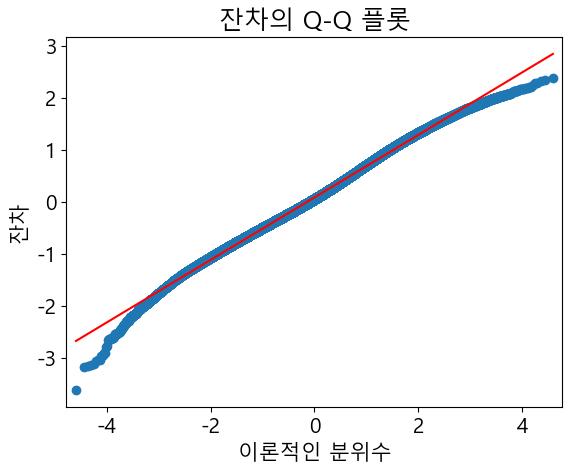

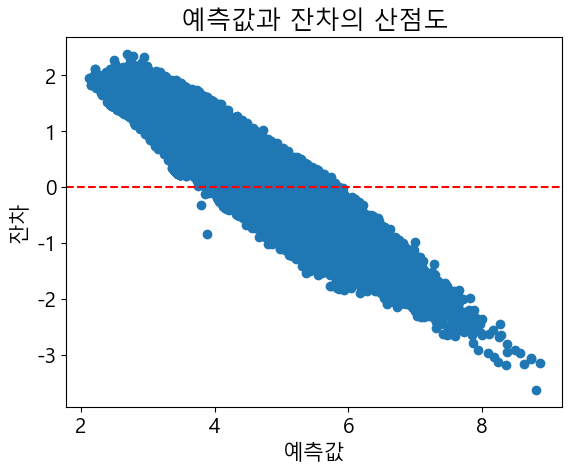

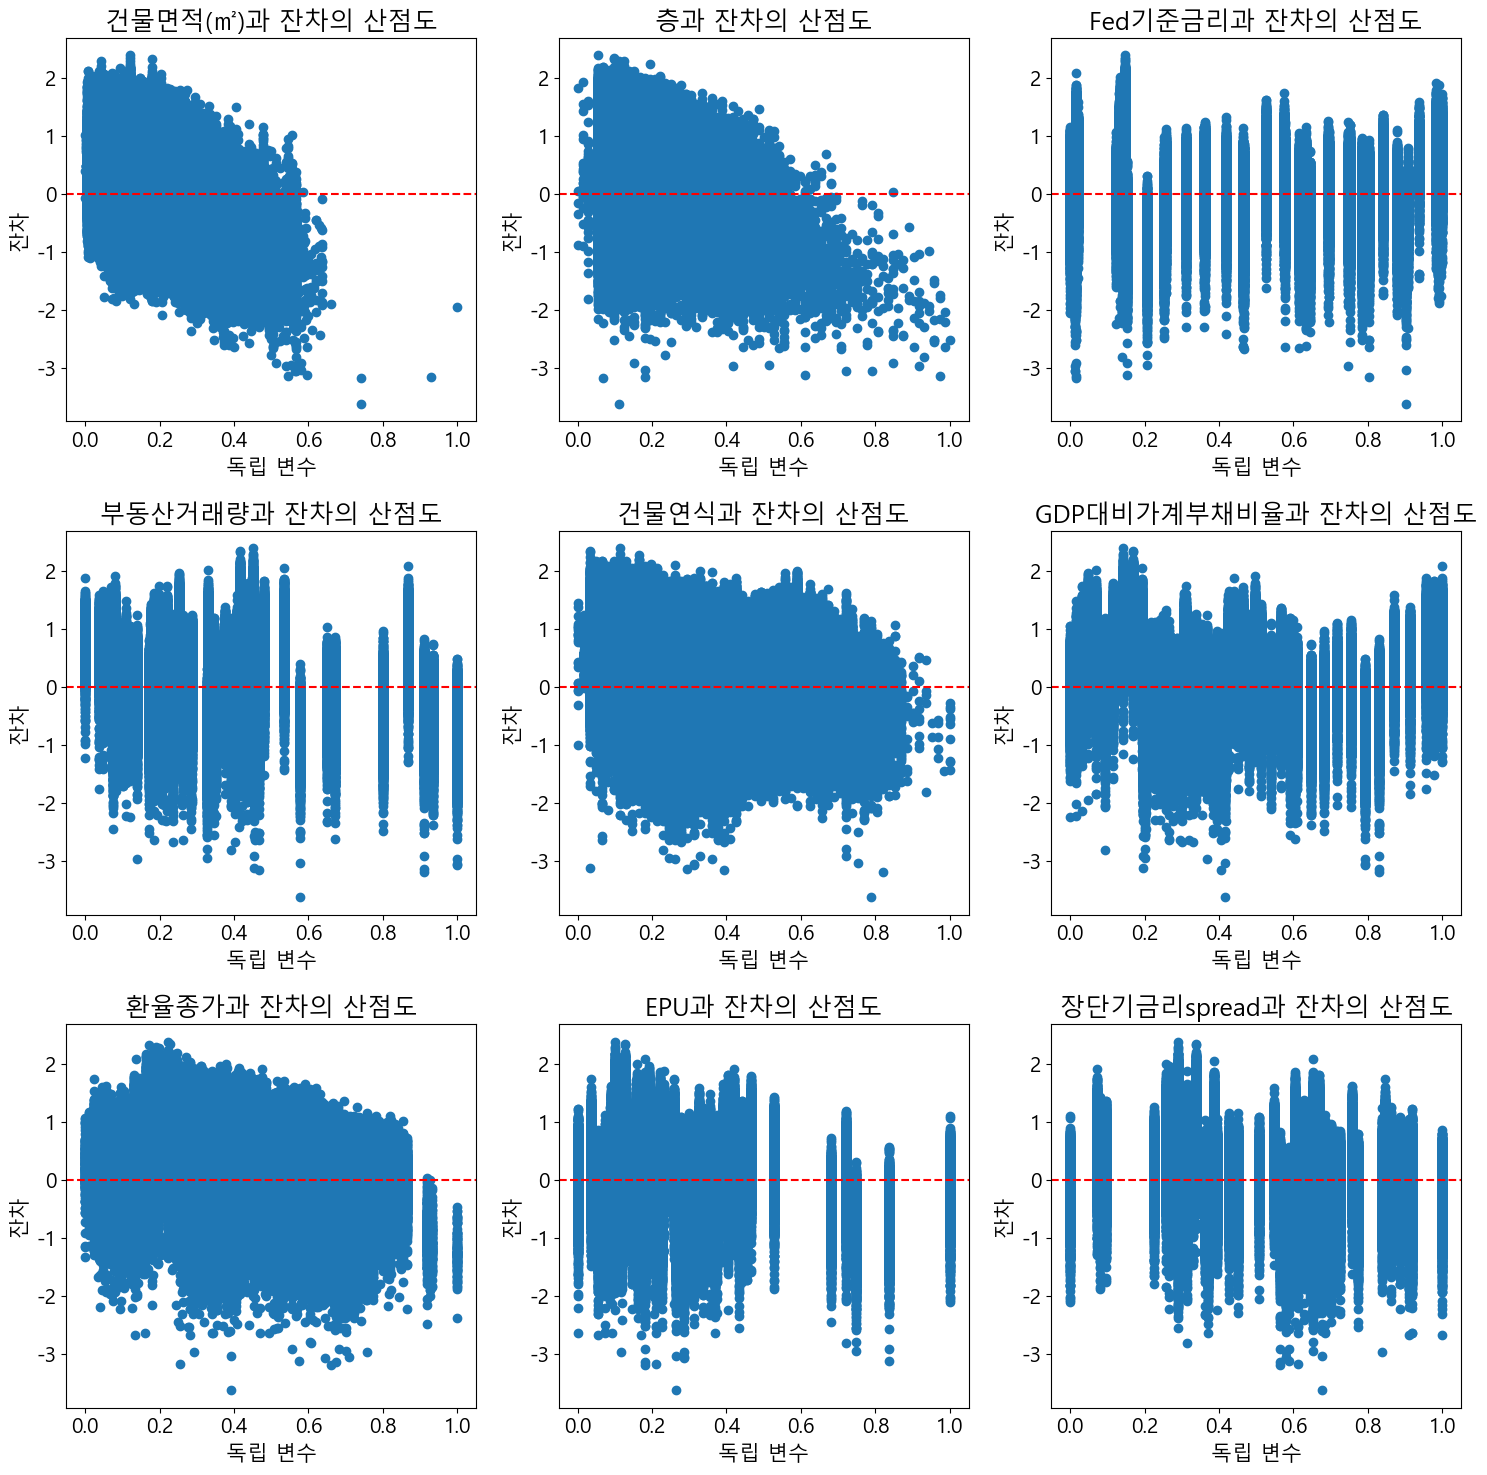

In [159]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = X_scaled_5
y = y_scaled

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()